In [3]:
import numpy as np

**Listcomps versus map and filter**

In [4]:
symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]

In [5]:
beyond_ascii = list(filter(lambda c: c> 127,map(ord,symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

**Productos cartesianos**

* Listcomps puede generar listas a partir del producto cartesiano de dos o más iterables. Los elementos que componen el producto cartesiano son tuplas formadas por elementos de cada iterable de entrada. 

* La lista resultante tiene una longitud igual a las longitudes de los iterables de entrada multiplicadas.

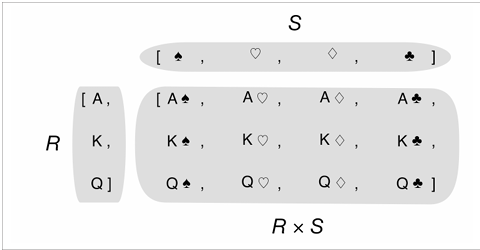

Por ejemplo, imagina que necesitas producir una lista de camisetas disponibles en 2 colores y tres tamaños. Muestra como hacerlo usando listcomp, el resultado son 6 items

In [6]:
colors = ["black","white"]
sizes = ["S","M","L"]

In [7]:
for color in colors:
    for size in sizes:
        print((color,size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


Observe cómo la lista resultante se ordena como si los bucles for estuvieran anidados en el mismo orden en que aparecen en la listacomp.

In [8]:
#Cartesian product using a list comprehension.
#Fue la forma de que un un bucle anidado fuera una list comprehension
tshirts = [(color,size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [9]:
tshirts = [(color,size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

**Tuplas como registros**

* Las tuplas contienen registros: cada elemento de la tupla contiene los datos de un campo y la posición del elemento le da su significado.

* Si se considera una tupla como una lista inmutable, la cantidad y el orden de los elementos pueden o no ser importantes dependiendo del contexto. Pero cuando se utiliza una tupla como una
colección de campos, el número de elementos suele ser fijo y su orden siempre es vital.

* Observe que en todas las expresiones siguientes, ordenar la tupla destruiría la información porque el significado de cada dato viene dado por su posición en la tupla.

In [10]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)  
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    """
    Diferentes formas de formatear la cadena 
    y mostrar los valores de la tupla
    """
    # print('%s/%s' % (passport[0],passport[1]))
    # print(f'{passport[0]}/{passport[1]}')
    print('%s/%s' % passport)


BRA/CE342567
ESP/XDA205856
USA/31195855


estás desempaquetando cada tupla de traveler_ids en dos variables: country y _. La coma después de country indica que solo estás interesado en el primer elemento de cada tupla (en este caso, el código de país), y _ es una convención en Python que se usa para ignorar variables que no necesitas en una desestructuración de tupla o lista.

In [11]:
#Desempaquetado de tuplas
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


In [12]:
countrys = [country for country, _ in traveler_ids]
countrys

['USA', 'BRA', 'ESP']

In [13]:
for _,item in traveler_ids:
    print(item)

31195855
CE342567
XDA205856


pag 55

In [15]:
from fpdf import FPDF
import pandas as pd

# Crear el documento PDF
pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Configuración de la portada
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Análisis Comparativo de Incentivos para Agentes en Aseguradoras - Ramo de Autos y Flotillas", ln=True, align='C')
pdf.ln(10)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 10, txt="[Fecha: Julio 2024]\n\nEste documento presenta un análisis comparativo de los incentivos ofrecidos por varias aseguradoras en el ramo de autos y flotillas. El análisis incluye detalles específicos sobre los bonos, sus cifras y rangos, y un ranking de las aseguradoras basado en sus ventajas y beneficios.")
pdf.ln(10)

# Añadir análisis de cada aseguradora
def add_insurer_details(pdf, title, details):
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=title, ln=True, align='L')
    pdf.ln(5)
    pdf.set_font("Arial", size=10)
    for detail in details:
        pdf.cell(200, 10, txt=detail['title'], ln=True, align='L')
        pdf.ln(3)
        for item in detail['items']:
            pdf.cell(200, 10, txt=f"- {item['desc']}: {item['value']}", ln=True, align='L')
        pdf.ln(5)

# Detalles de cada aseguradora (continuación del código original)
gnp_details = [
    {
        'title': 'Bono Inicial',
        'items': [
            {'desc': '$510,000', 'value': '14%'},
            {'desc': '$430,000', 'value': '12%'},
            {'desc': '$330,000', 'value': '11%'},
            {'desc': '$260,000', 'value': '10%'},
            {'desc': '$210,000', 'value': '9%'},
            {'desc': '$160,000', 'value': '8%'},
            {'desc': '$120,000', 'value': '6%'}
        ]
    },
    {
        'title': 'Bono de Cartera',
        'items': [
            {'desc': '2,000,000', 'value': '5.0% (0%), 8.0% (5%), 11.0% (10%)'},
            {'desc': '1,200,000', 'value': '4.0% (0%), 7.0% (5%), 9.5% (10%)'},
            {'desc': '950,000', 'value': '3.0% (0%), 6.0% (5%), 8.5% (10%)'},
            {'desc': '530,000', 'value': '2.0% (0%), 5.0% (5%), 7.5% (10%)'},
            {'desc': '260,000', 'value': '1.0% (0%), 4.0% (5%), 7.0% (10%)'}
        ]
    },
    {
        'title': 'Bono de Siniestralidad',
        'items': [
            {'desc': '40%', 'value': '4%'},
            {'desc': '50%', 'value': '3%'},
            {'desc': '60%', 'value': '2%'}
        ]
    }
]

mapfre_details = [
    {
        'title': 'Bono de Producción',
        'items': [
            {'desc': '$200,000', 'value': '10%'},
            {'desc': '$150,000', 'value': '7%'},
            {'desc': '$100,000', 'value': '5%'}
        ]
    },
    {
        'title': 'Bono de Rentabilidad',
        'items': [
            {'desc': '< 50%', 'value': '6%'},
            {'desc': '50%-60%', 'value': '4%'},
            {'desc': '60%-70%', 'value': '2%'}
        ]
    }
]

axa_details = [
    {
        'title': 'Bono de Producción',
        'items': [
            {'desc': '$1,000,000', 'value': '9%'},
            {'desc': '$750,000', 'value': '7%'},
            {'desc': '$500,000', 'value': '5%'},
            {'desc': '$250,000', 'value': '3%'}
        ]
    },
    {
        'title': 'Bono de Crecimiento',
        'items': [
            {'desc': '20%', 'value': '6%'},
            {'desc': '15%', 'value': '5%'},
            {'desc': '10%', 'value': '4%'},
            {'desc': '5%', 'value': '2%'}
        ]
    },
    {
        'title': 'Bono de Rentabilidad',
        'items': [
            {'desc': '< 50%', 'value': '8%'},
            {'desc': '50%-60%', 'value': '5%'},
            {'desc': '60%-70%', 'value': '3%'}
        ]
    }
]

hdi_details = [
    {
        'title': 'Bono de Producción',
        'items': [
            {'desc': '$500,000', 'value': '10%'},
            {'desc': '$300,000', 'value': '8%'},
            {'desc': '$150,000', 'value': '6%'},
            {'desc': '$50,000', 'value': '4%'}
        ]
    },
    {
        'title': 'Bono de Rentabilidad',
        'items': [
            {'desc': '< 50%', 'value': '7%'},
            {'desc': '50%-60%', 'value': '5%'},
            {'desc': '60%-70%', 'value': '3%'}
        ]
    }
]

# Añadir detalles de cada aseguradora
add_insurer_details(pdf, 'GNP Consolidados - Autos y Flotillas', gnp_details)
add_insurer_details(pdf, 'MAPFRE - Autos y Flotillas', mapfre_details)
add_insurer_details(pdf, 'AXA - Autos y Flotillas', axa_details)
add_insurer_details(pdf, 'HDI - Autos y Flotillas', hdi_details)

# Comparación General
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Comparación General", ln=True, align='L')
pdf.ln(10)

comparison_data = [
    ["Aspecto", "GNP Consolidados", "MAPFRE", "AXA", "HDI"],
    ["Tipos de Bono", "Productividad, Rentabilidad, Integral", "Producción, Rentabilidad", "Producción, Crecimiento, Rentabilidad", "Producción, Rentabilidad"],
    ["Beneficios", "Diversificación de incentivos, claridad en criterios, bonos adicionales", "Incremento progresivo, enfoque en siniestralidad", "Reconocimiento a los mejores agentes, participación amplia", "Incremento significativo, premios por eficiencia"],
    ["Ventajas", "Diversificación, claridad, incentivos adicionales", "Simplicidad, flexibilidad en el pago", "Enfoque en diversos productos, bonificación por segmento", "Diversidad en los bonos, metas claras"],
    ["Desventajas", "Requisitos rigurosos, complejidad, dependencia de siniestralidad", "Enfoque limitado, dependencia en el volumen", "Requisitos elevados, condiciones especiales", "Altos requisitos iniciales, dependencia de la siniestralidad"]
]

for row in comparison_data:
    pdf.set_font("Arial", size=10)
    for item in row:
        pdf.cell(40, 10, txt=item, border=1)
    pdf.ln(10)

# Ranking de Aseguradoras
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Ranking de Aseguradoras", ln=True, align='L')
pdf.ln(10)

# Continúa añadiendo contenido aquí...
ranking_data = [
    {"rank": 1, "name": "AXA", "reasons": ["Altas bonificaciones por producción, crecimiento y rentabilidad", "Amplia cobertura de productos y reconocimiento adicional por segmentación alfa"]},
    {"rank": 2, "name": "GNP Consolidados", "reasons": ["Diversificación de incentivos, claridad en los criterios, y bonos adicionales como el Integral", "Bonos por buen desempeño y buena siniestralidad"]},
    {"rank": 3, "name": "HDI", "reasons": ["Diversidad en los bonos y claridad en las metas", "Bonificaciones significativas por producción y rentabilidad"]}]

# Guardar el documento PDF generado
pdf_file = "comparativo_incentivos_aseguradoras.pdf"
pdf.output(pdf_file)
print(f"Documento PDF '{pdf_file}' generado exitosamente.")


Documento PDF 'comparativo_incentivos_aseguradoras.pdf' generado exitosamente.
